#### Veri Madenciliği Uygulaması

Bu derste bir veri madenciliği uygulaması gerçekleştireceğiz. Lojistik regresyon ve destek vektör makineleri ile bir sınıflandırma gerçekleştirip hangi algoritmanın daha iyi sonnuç verdiğini gözlemlemeye çalışacağız ardından iyi sonuç veren algoritmayı kaydederek ilerde de kullanılmasını sağlayacağız.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
df.shape

(768, 9)

In [8]:
df[[
    "Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"
]] = df[[
    "Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"
]].replace(0,np.NaN)

In [9]:
#Eksik değerelrin doldurulması
df.fillna(df.mean(), inplace=True)

In [10]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
# Korelasyon Analizi
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.082989   
Glucose                      0.127911  1.000000       0.218367       0.192991   
BloodPressure                0.208522  0.218367       1.000000       0.192816   
SkinThickness                0.082989  0.192991       0.192816       1.000000   
Insulin                      0.056027  0.420157       0.072517       0.158139   
BMI                          0.021565  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.100966   
Age                          0.544341  0.266534       0.324595       0.127872   
Outcome                      0.221898  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.021565                 -0.033523   
Glucose                   0.420157  0.230941                  0.137060   
BloodPressure             0.072517  0.281268                 -0.002763   
SkinThickness             0.158139  0.542398                  0.100966   
Insulin                   1.000000  0.166586                  0.098634   
BMI                       0.166586  1.000000                  0.153400   
DiabetesPedigreeFunction  0.098634  0.153400                  1.000000   
Age                       0.136734  0.025519                  0.033561   
Outcome                   0.214411  0.311924                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266534  0.492928  
BloodPressure             0.324595  0.166074  
SkinThickness             0.127872  0.215299  
Insulin                   0.136734  0.214411  
BMI                       0.025519  0.311924  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

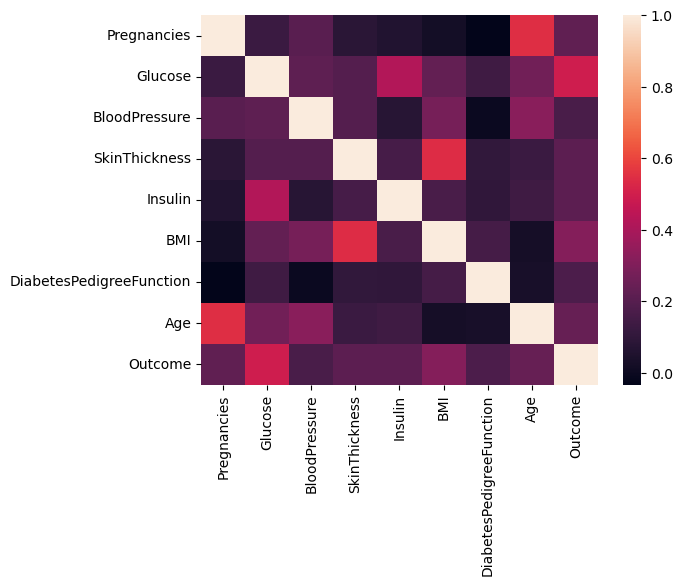

In [14]:
sns.heatmap(df.corr())

In [15]:
feature_names = df.corr().nlargest(4,"Outcome").index

In [16]:
df.corr().nlargest(4,"Outcome").index.tolist()

['Outcome', 'Glucose', 'BMI', 'Age']

Kullanılacak algoritmalar
##### 1- lojistik Regresyon
##### 2- Destek Vektör Regresyon

In [17]:
# Algoritmaların oluşturulması
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [18]:
X = df[["Glucose","BMI","Age"]]
y = df.iloc[:,8]

In [19]:
X

Glucose   BMI  Age
0      148.0  33.6   50
1       85.0  26.6   31
2      183.0  23.3   32
3       89.0  28.1   21
4      137.0  43.1   33
..       ...   ...  ...
763    101.0  32.9   63
764    122.0  36.8   27
765    121.0  26.2   30
766    126.0  30.1   47
767     93.0  30.4   23

[768 rows x 3 columns]

In [20]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [21]:
log_reg = linear_model.LogisticRegression()

In [22]:
log_reg_score = cross_val_score(log_reg,X,y,cv = 10,scoring="accuracy").mean()

In [23]:
log_reg_score

0.7669856459330144

In [24]:
results = []
results.append(log_reg_score)

In [25]:
results

[0.7669856459330144]

In [27]:
from sklearn import svm

In [28]:
linear_svm = svm.SVC(kernel="linear")

In [29]:
linear_svm_score = cross_val_score(linear_svm,X,y,cv=10,scoring="accuracy").mean()

In [30]:
linear_svm_score

0.7656527682843473

In [31]:
results.append(linear_svm_score)

In [32]:
results

[0.7669856459330144, 0.7656527682843473]

In [33]:
import pickle

In [34]:
filename = "diabets.sav"

In [37]:
log_reg.fit(X,y)
pickle.dump(log_reg,open(filename,"wb"))

In [38]:
# Modelin çağrılması
loaded_model = pickle.load(open(filename, "rb"))

In [43]:
loaded_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [44]:
# Tahmin yapılması
Glucose = 70
BMI = 60
Age = 50
prediction = loaded_model.predict([[Glucose,BMI,Age]])

C:\Users\Veli\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
prediction

array([1], dtype=int64)